***In this notebook, I try to do draw insights and relations between variaous features from the dataset. I hope this notebook will help you to get a better insight of the data. If you find this helpful, please do upvote. In my next notebook, I will try to make forecasting using Facebook Prophet.***

In [3]:


import numpy as np 
import pandas as pd 


In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


In [7]:
# Load the data

data = pd.read_csv("Dataset.csv")

In [8]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [9]:
# Data preprocessing

'''
1.Convert Date into Datetime format.
2.Removing ',' from Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits.
3.Convert the above values into float.
'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [10]:
# Function to remove commas
def remove_commas(x):
    return float(x.replace(',', ''))

In [11]:
# Apply the preprocessing functions

data['Date'] = pd.to_datetime(data['Date'])
data['Page.Loads'] = data['Page.Loads'].apply(lambda x : remove_commas(x))
data['Unique.Visits'] = data['Unique.Visits'].apply(lambda x : remove_commas(x))
data['First.Time.Visits'] = data['First.Time.Visits'].apply(lambda x : remove_commas(x))
data['Returning.Visits'] = data['Returning.Visits'].apply(lambda x : remove_commas(x))

In [12]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0
1,2,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0
2,3,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0
3,4,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0
4,5,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0


# EDA

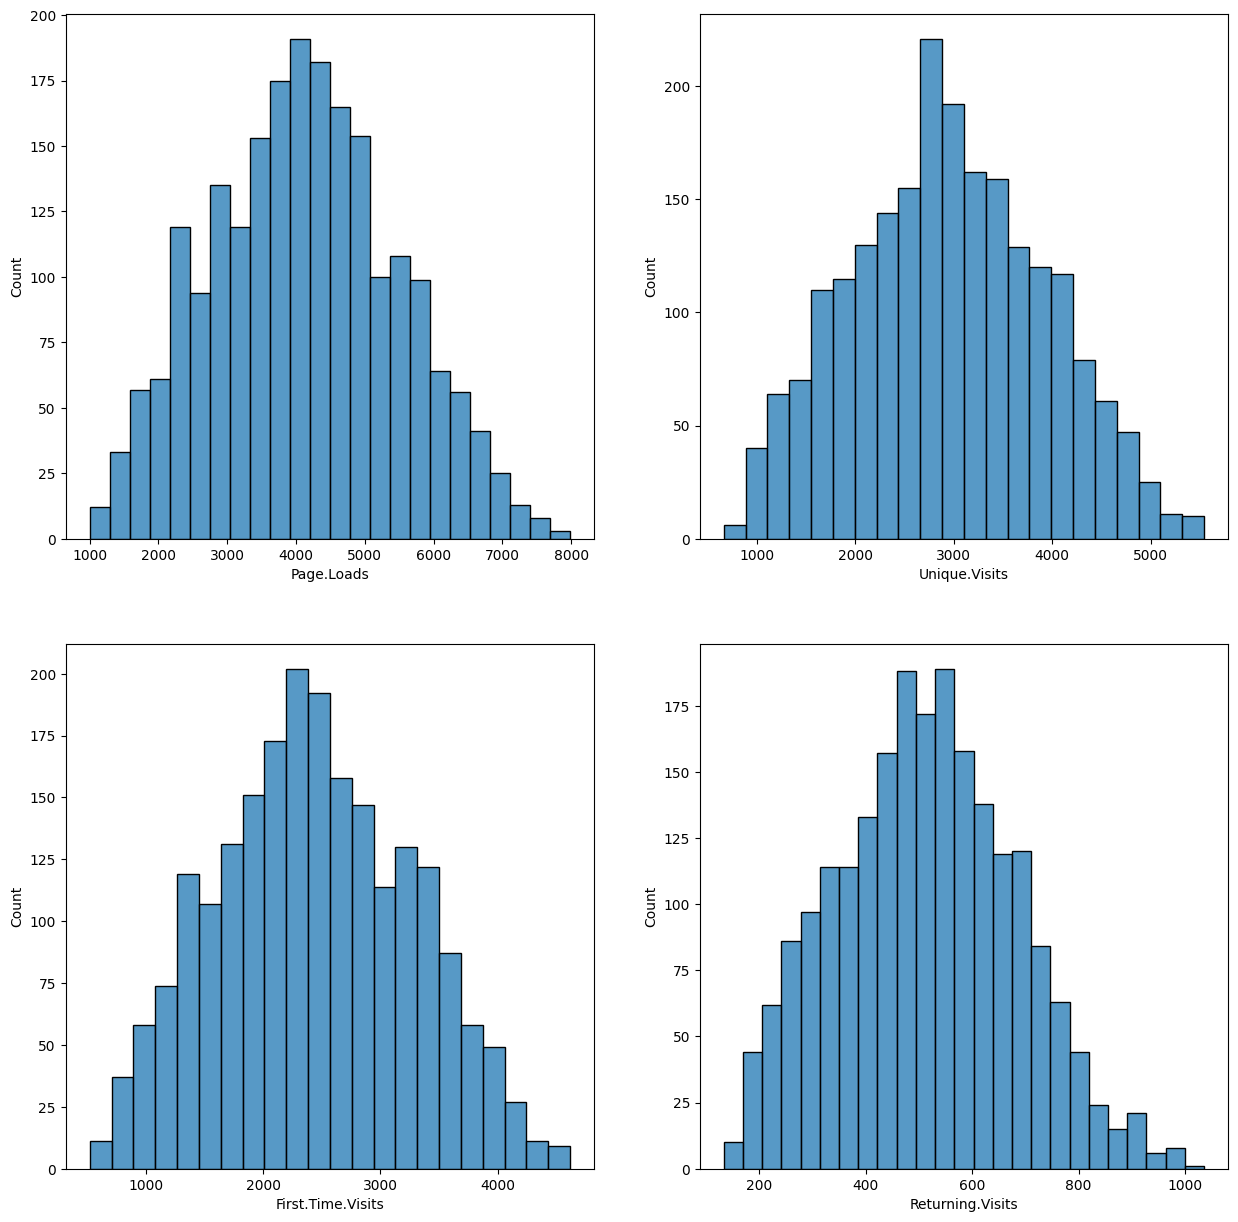

In [13]:
# Frequency distribution of each continuous column
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data, x=col)

**Visually the distributions appear to be normal**

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\3512457119.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\3512457119.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


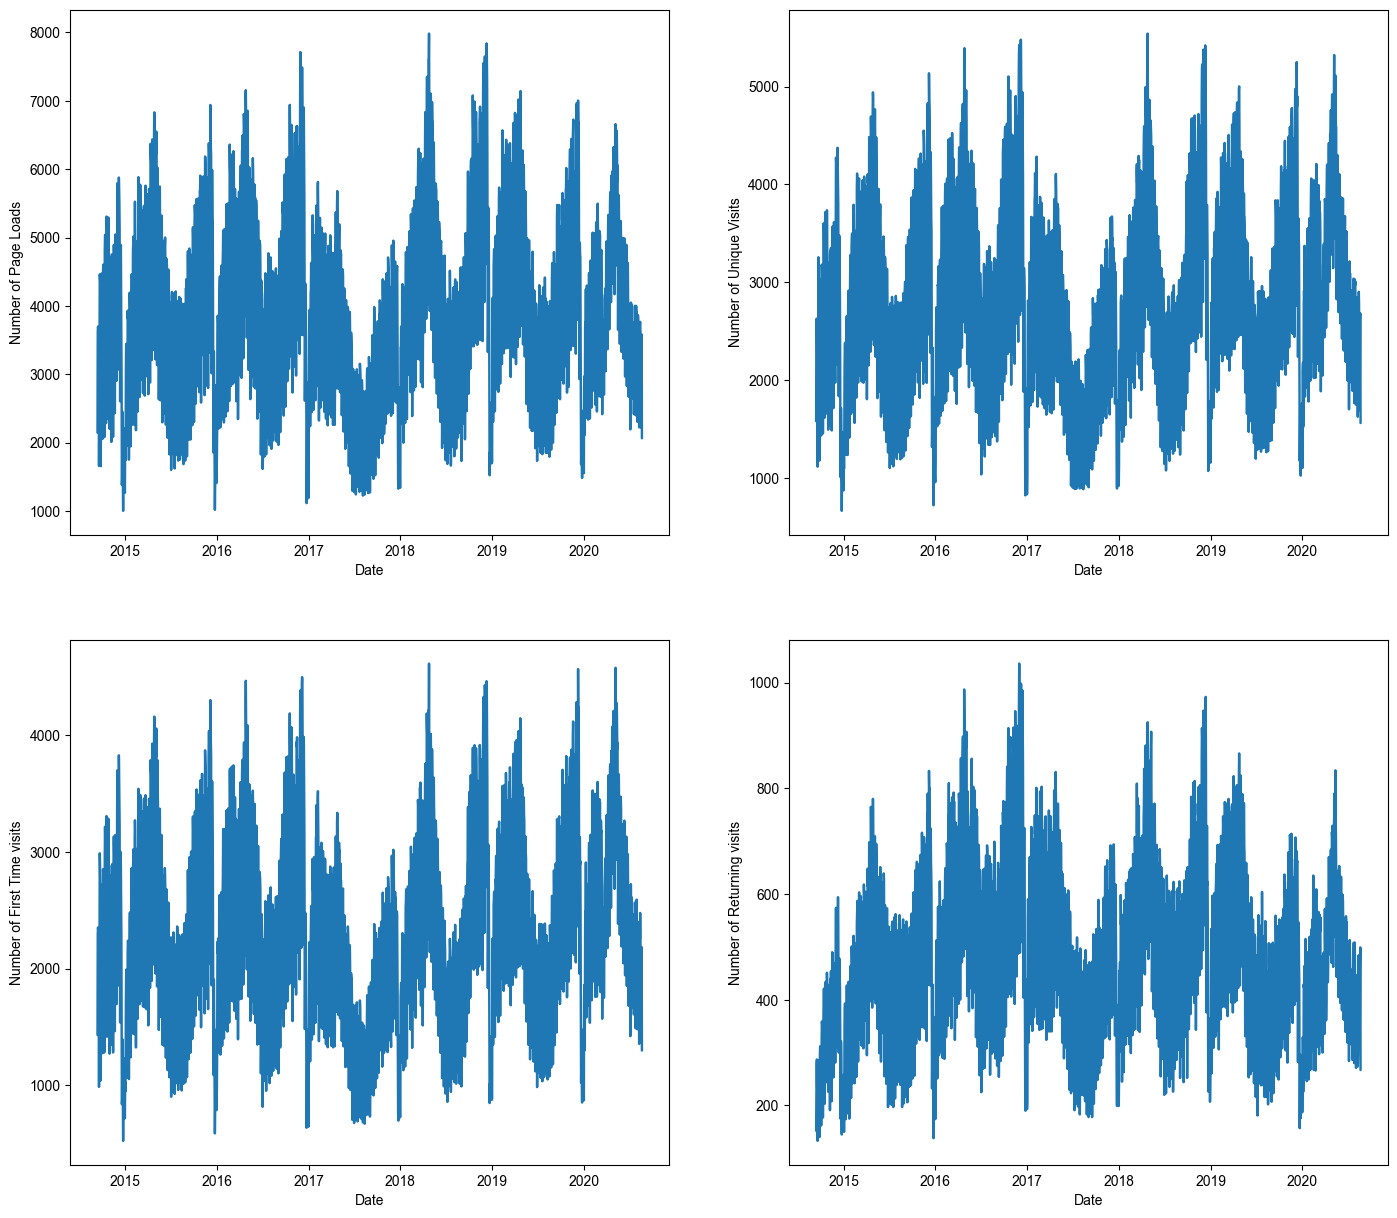

In [25]:
# Perform the EDA

figure, ax = plt.subplots(2, 2, figsize=(17, 15))
plt.style.use('seaborn')

ax1 = ax[0]
ax2 = ax[1]

# Plot the Number of Page Loads with time
ax1[0].plot(data['Date'], data['Page.Loads'])
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Number of Page Loads")

# Plot the Number of Unique Visits with time
ax1[1].plot(data['Date'], data['Unique.Visits'])
ax1[1].set_xlabel("Date")
ax1[1].set_ylabel("Number of Unique Visits")

# Plot the Number of First Time visits with time
ax2[0].plot(data['Date'], data['First.Time.Visits'])
ax2[0].set_xlabel("Date")
ax2[0].set_ylabel("Number of First Time visits")

# Plot the Number of Returning visits with time
ax2[1].plot(data['Date'], data['Returning.Visits'])
ax2[1].set_xlabel("Date")
ax2[1].set_ylabel("Number of Returning visits")

figure.show()

In [26]:
# group the data by day and draw insights
day_grouped_data = data.groupby('Day')

## Day wise analysis

In [35]:
# Perform the EDA

def day_wise_EDA(day):
    sun_data = day_grouped_data.get_group(day)
    figure, ax = plt.subplots(2, 2, figsize=(17, 15))
    plt.style.use('seaborn')

    ax1 = ax[0]
    ax2 = ax[1]

    # Plot the Number of Page Loads with time
    print("=================================================================={} ANALYSIS======================================================".format(day.upper()))
    ax1[0].plot(sun_data['Date'], sun_data['Page.Loads'])
    ax1[0].set_xlabel("Date")
    ax1[0].set_ylabel("Number of Page Loads")

    # Plot the Number of Unique Visits with time
    ax1[1].plot(sun_data['Date'], sun_data['Unique.Visits'])
    ax1[1].set_xlabel("Date")
    ax1[1].set_ylabel("Number of Unique Visits")

    # Plot the Number of First Time visits with time
    ax2[0].plot(sun_data['Date'], sun_data['First.Time.Visits'])
    ax2[0].set_xlabel("Date")
    ax2[0].set_ylabel("Number of First Time visits")

    # Plot the Number of Returning visits with time
    ax2[1].plot(sun_data['Date'], sun_data['Returning.Visits'])
    ax2[1].set_xlabel("Date")
    ax2[1].set_ylabel("Number of Returning visits")

    figure.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================SUNDAY ANALYSIS======================================================


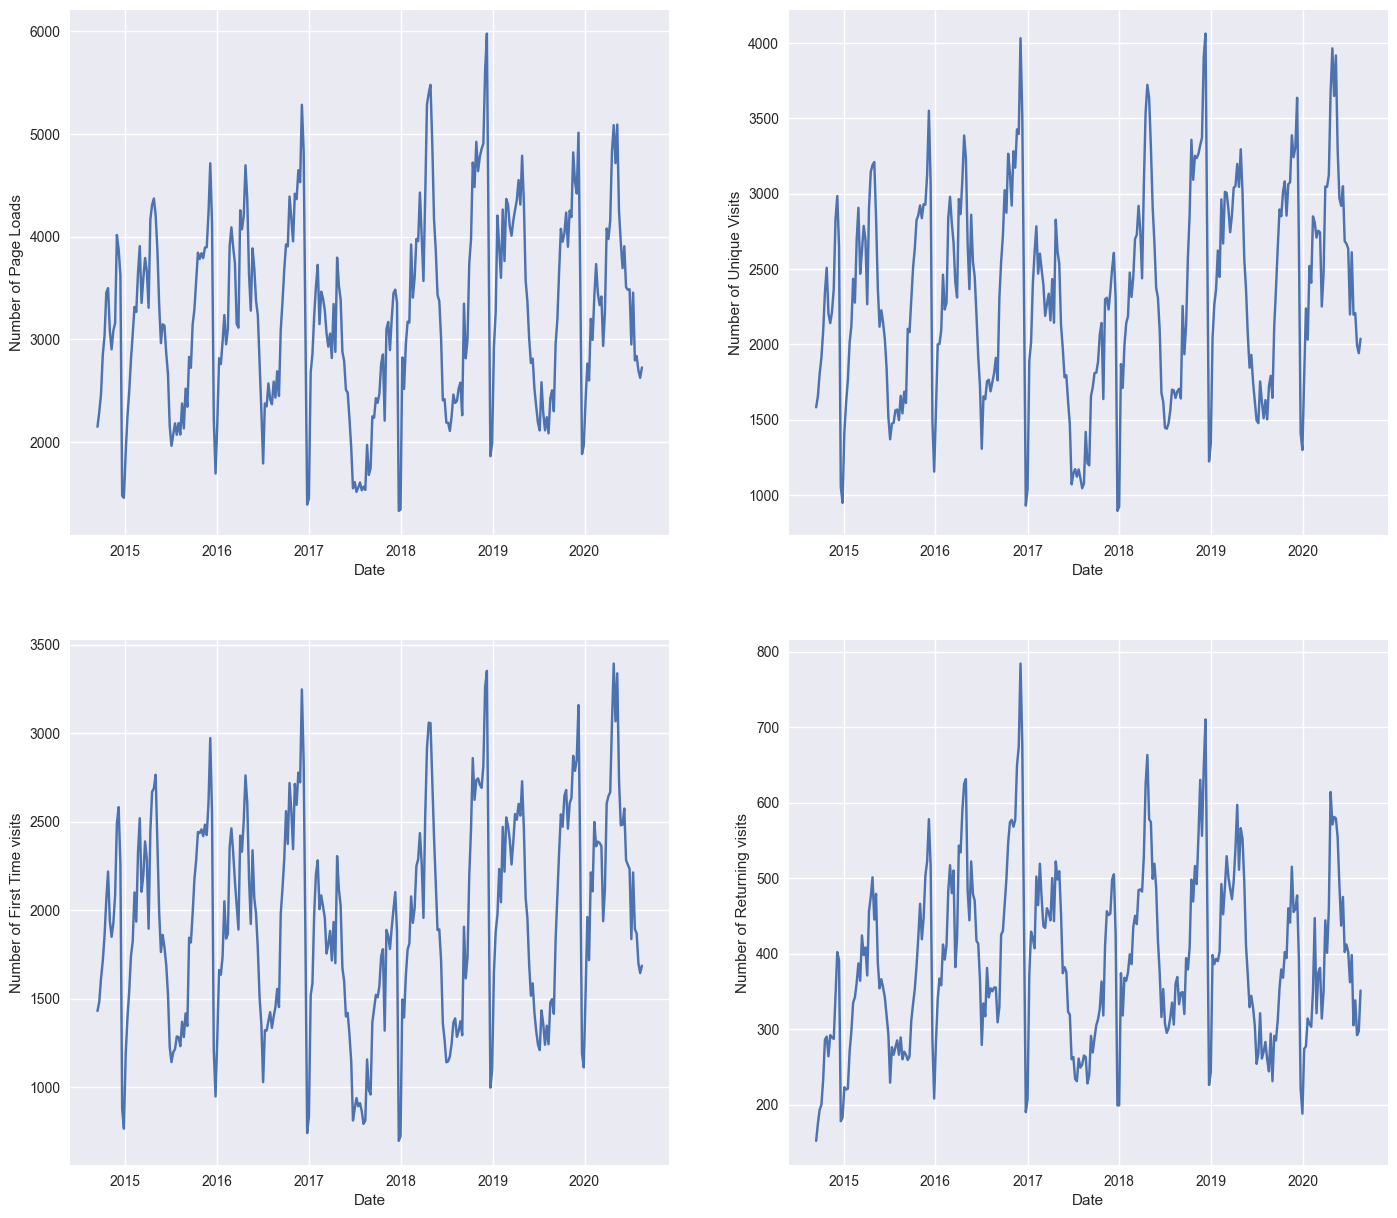

In [31]:
# Call the above function for every day

# 1. Sunday
day_wise_EDA('Sunday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================MONDAY ANALYSIS======================================================


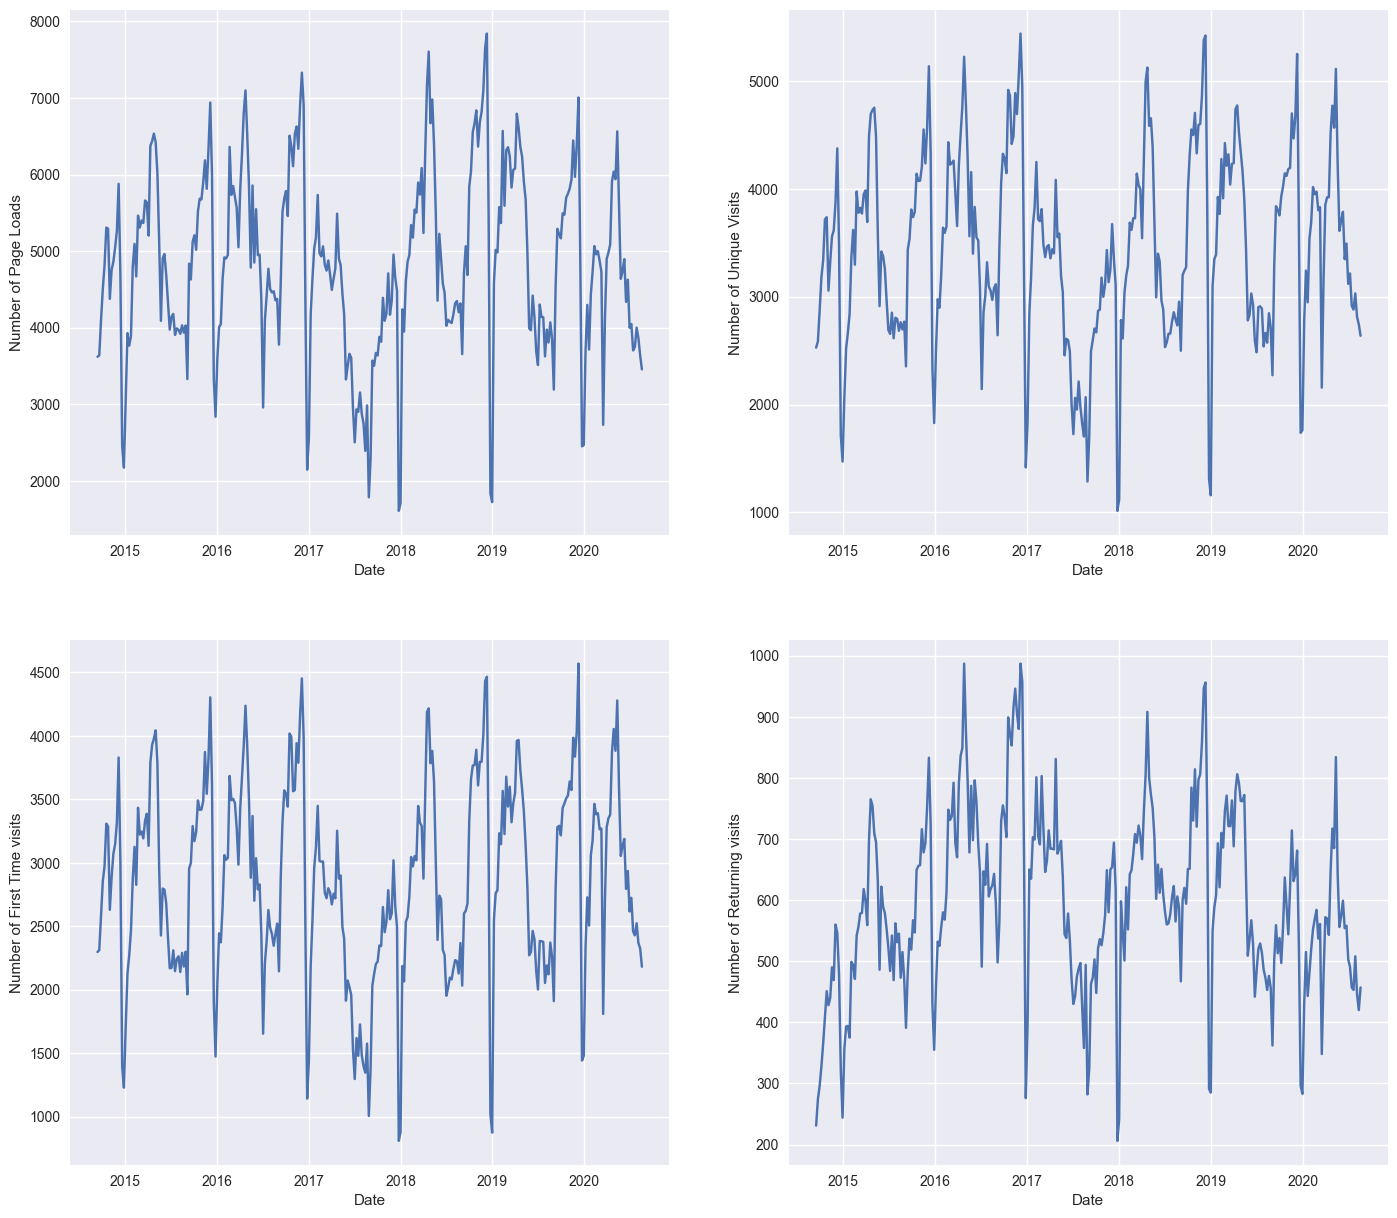

In [36]:
# 2. Monday
day_wise_EDA('Monday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================TUESDAY ANALYSIS======================================================


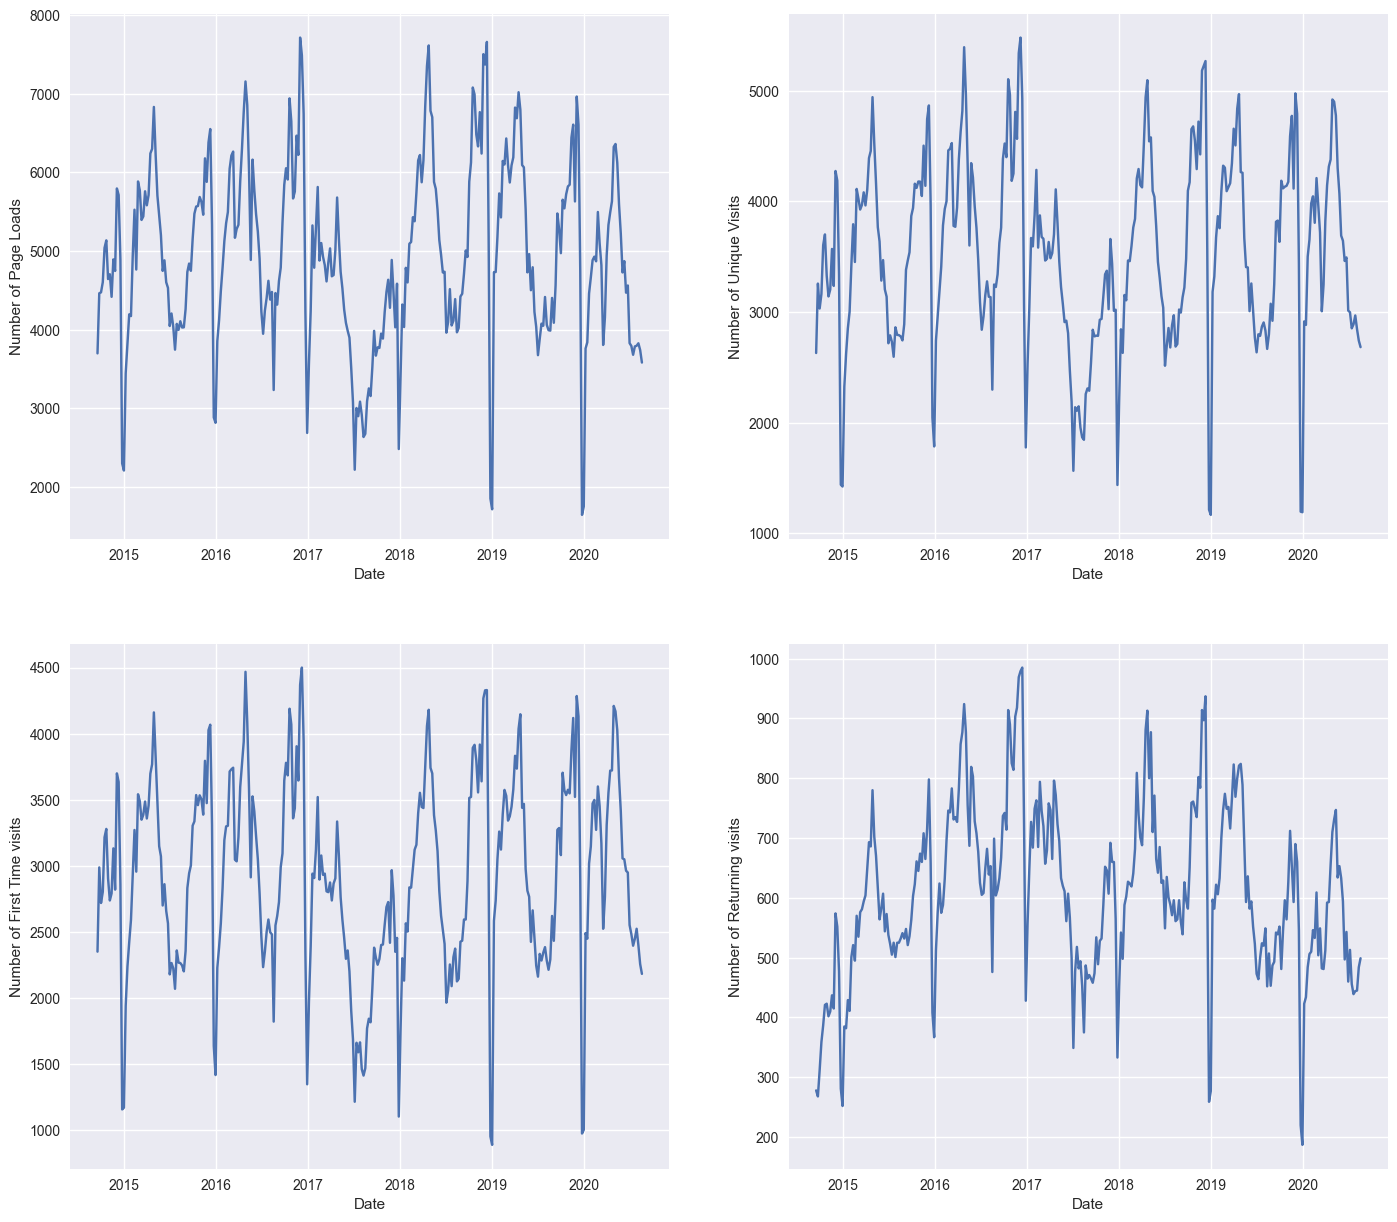

In [37]:
# 3. Tuesday
day_wise_EDA('Tuesday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================WEDNESDAY ANALYSIS======================================================


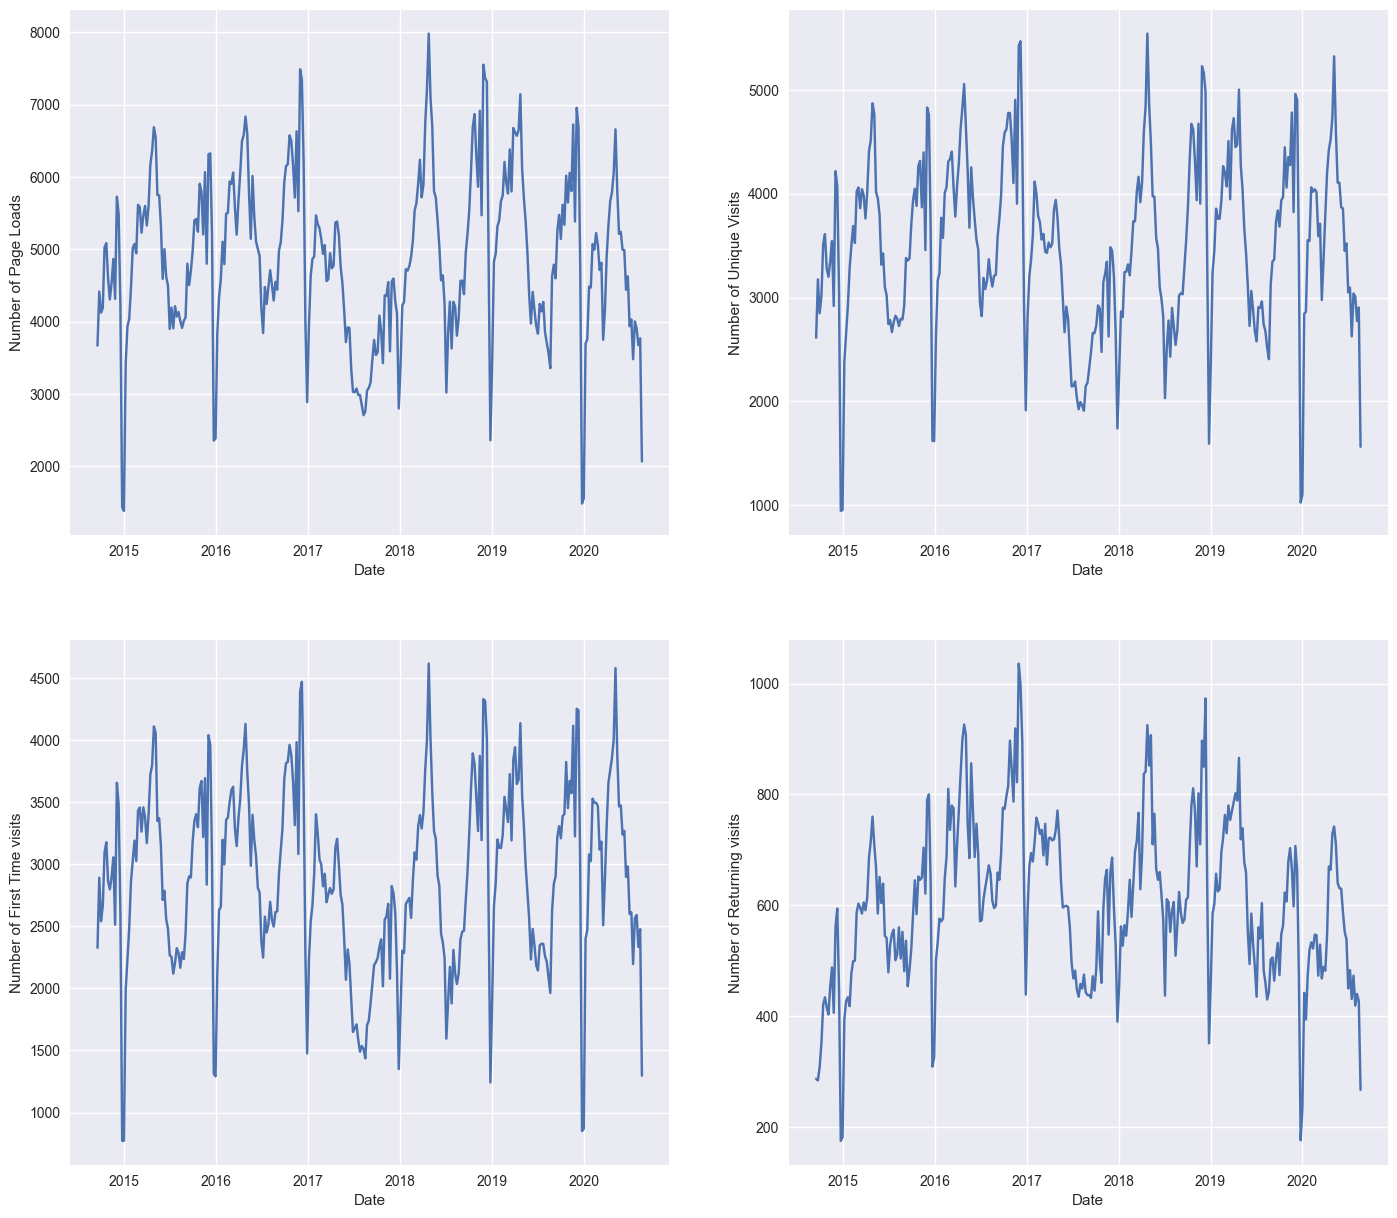

In [41]:
# 4. Wednesday
day_wise_EDA('Wednesday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================THURSDAY ANALYSIS======================================================


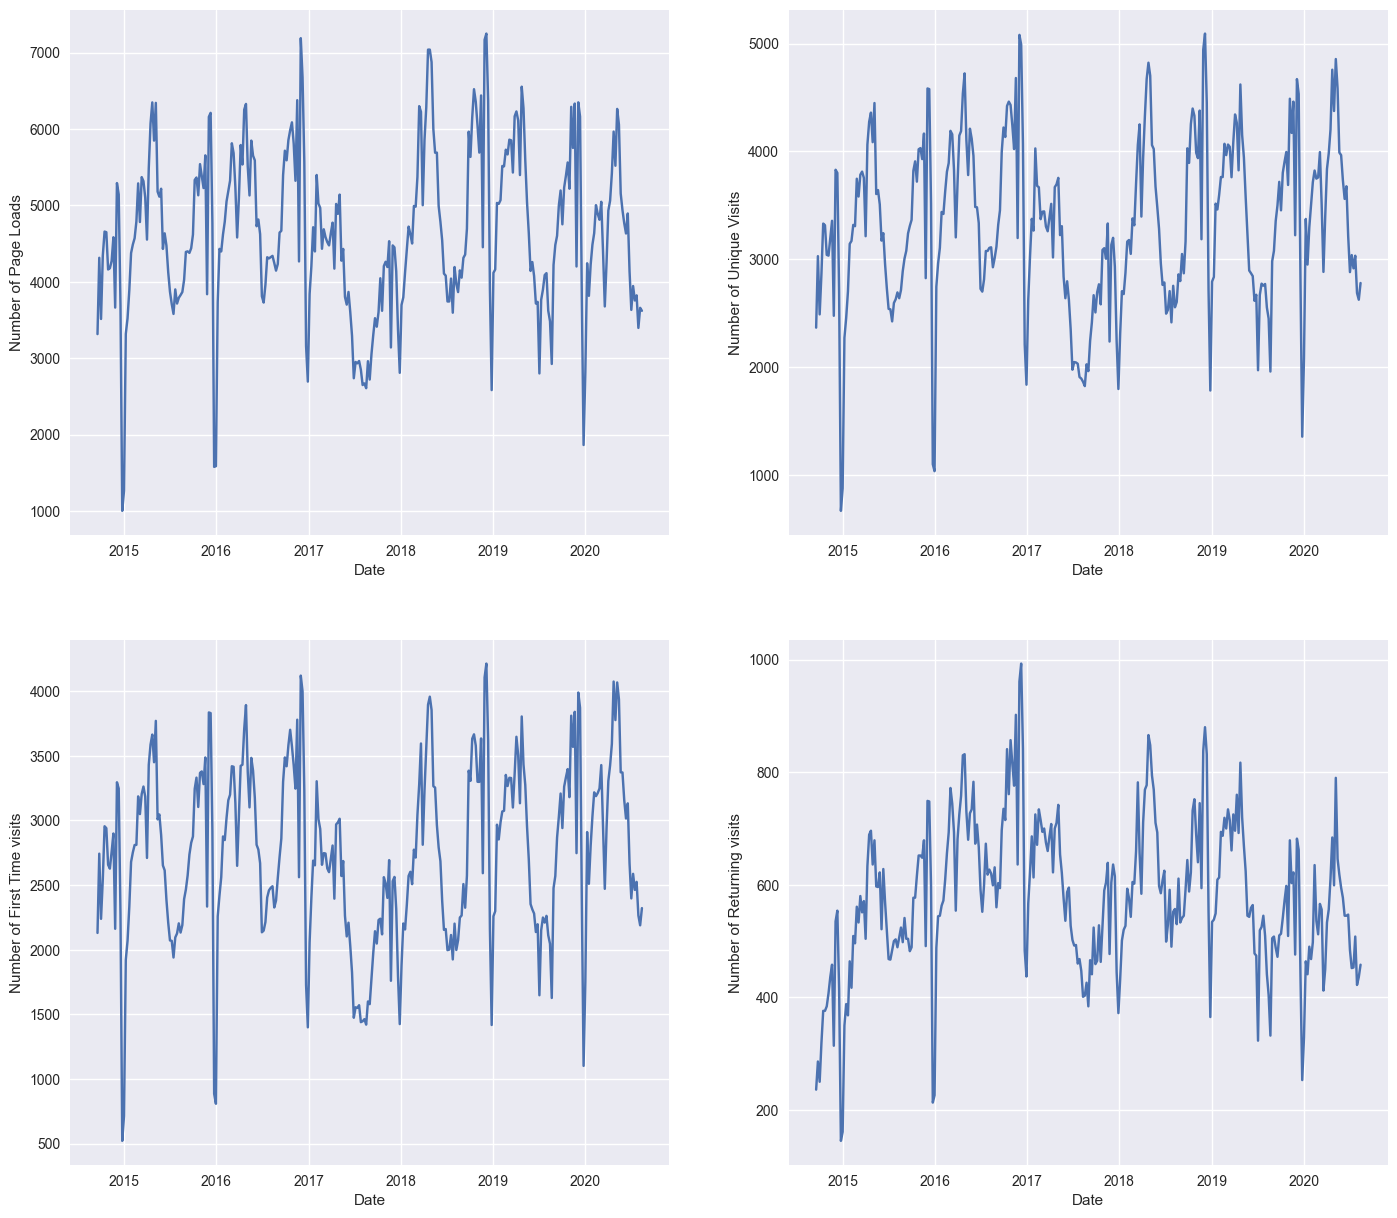

In [40]:
# 5. Thursday
day_wise_EDA('Thursday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================FRIDAY ANALYSIS======================================================


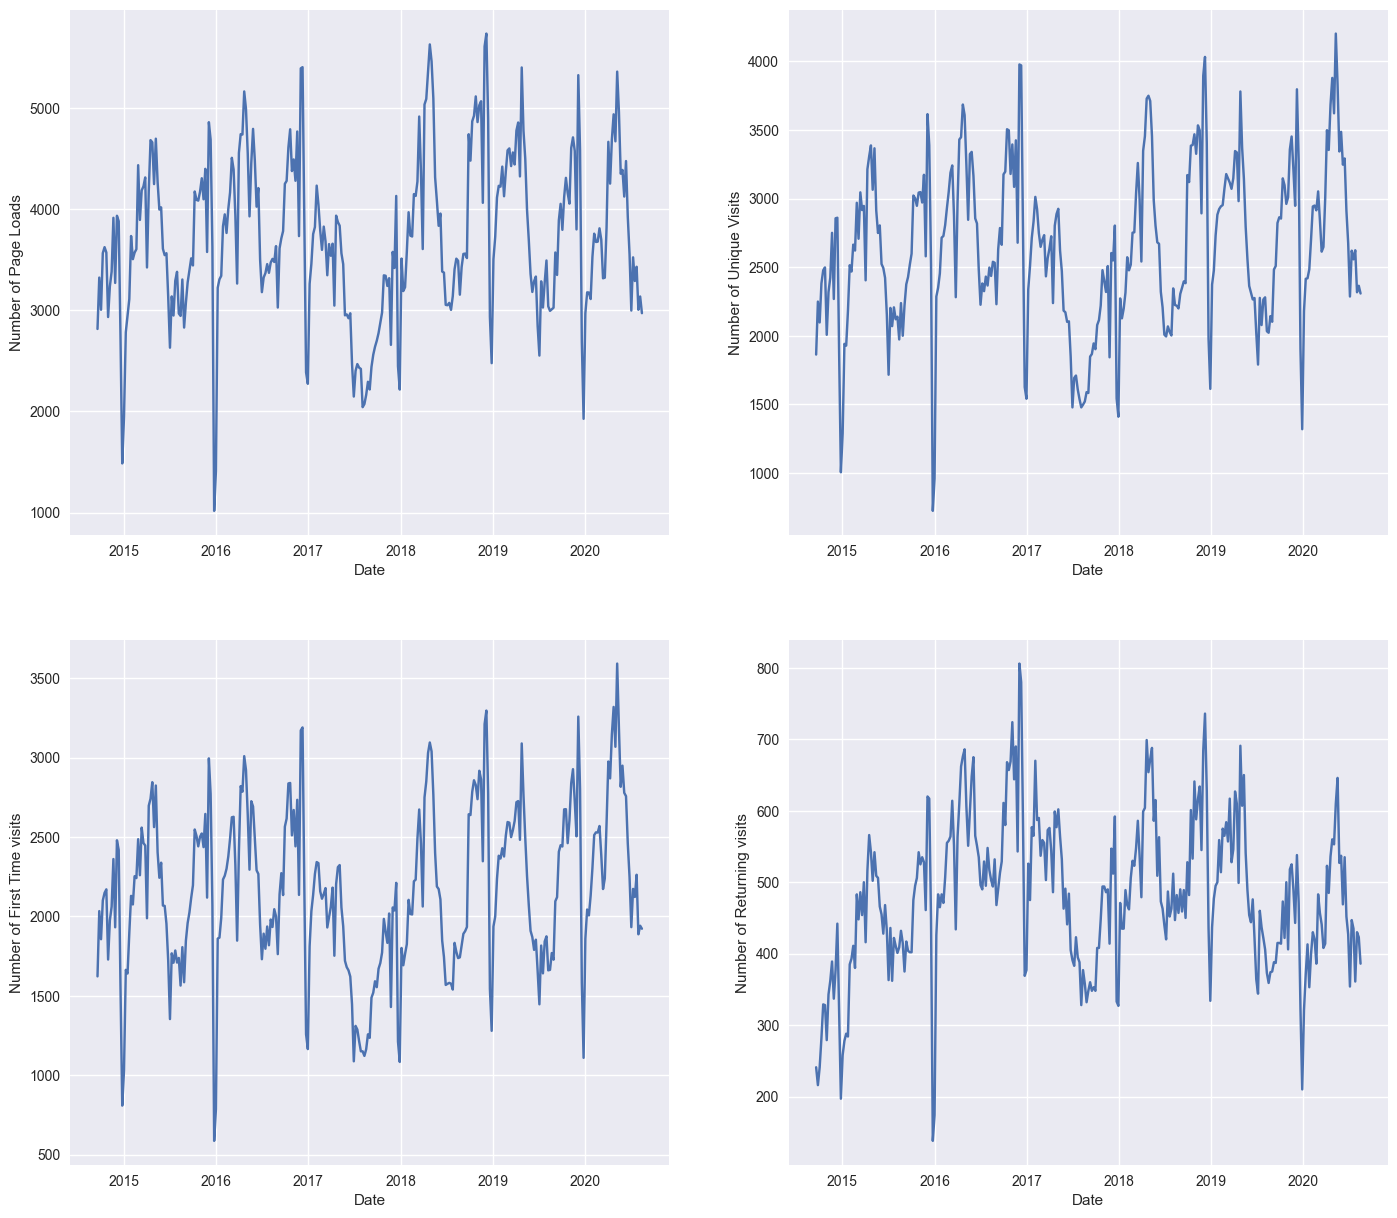

In [39]:
# 6. Friday
day_wise_EDA('Friday')

C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\chara\AppData\Local\Temp\ipykernel_22972\417883031.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


==================================================================SATURDAY ANALYSIS======================================================


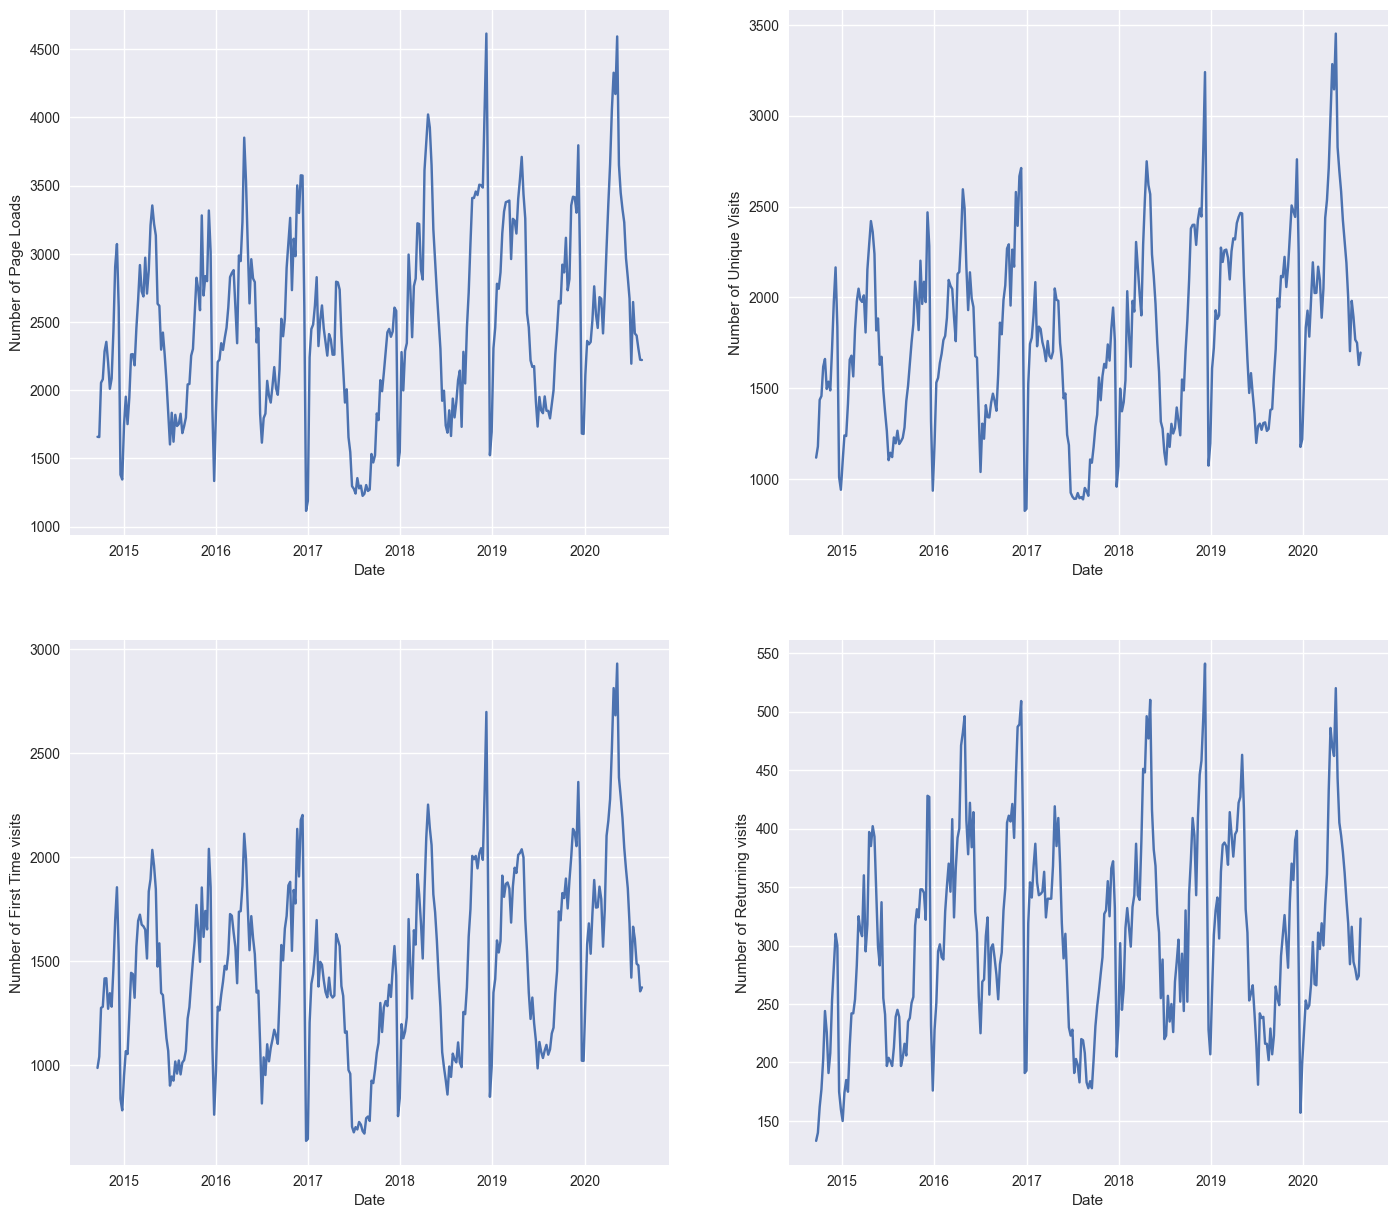

In [38]:
# 7. Saturday
day_wise_EDA('Saturday')

## Average Value Counts for each day

In [42]:
avg_day_data = day_grouped_data.mean().reset_index().drop('Row', axis=1)
avg_day_data

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,6.0,2017-09-01 00:00:00,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,2.0,2017-08-31 12:00:00,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,7.0,2017-09-02 00:00:00,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,1.0,2017-08-30 12:00:00,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,5.0,2017-08-31 00:00:00,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,3.0,2017-09-01 12:00:00,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4.0,2017-09-02 12:00:00,4893.916129,3502.012903,2895.490323,606.522581


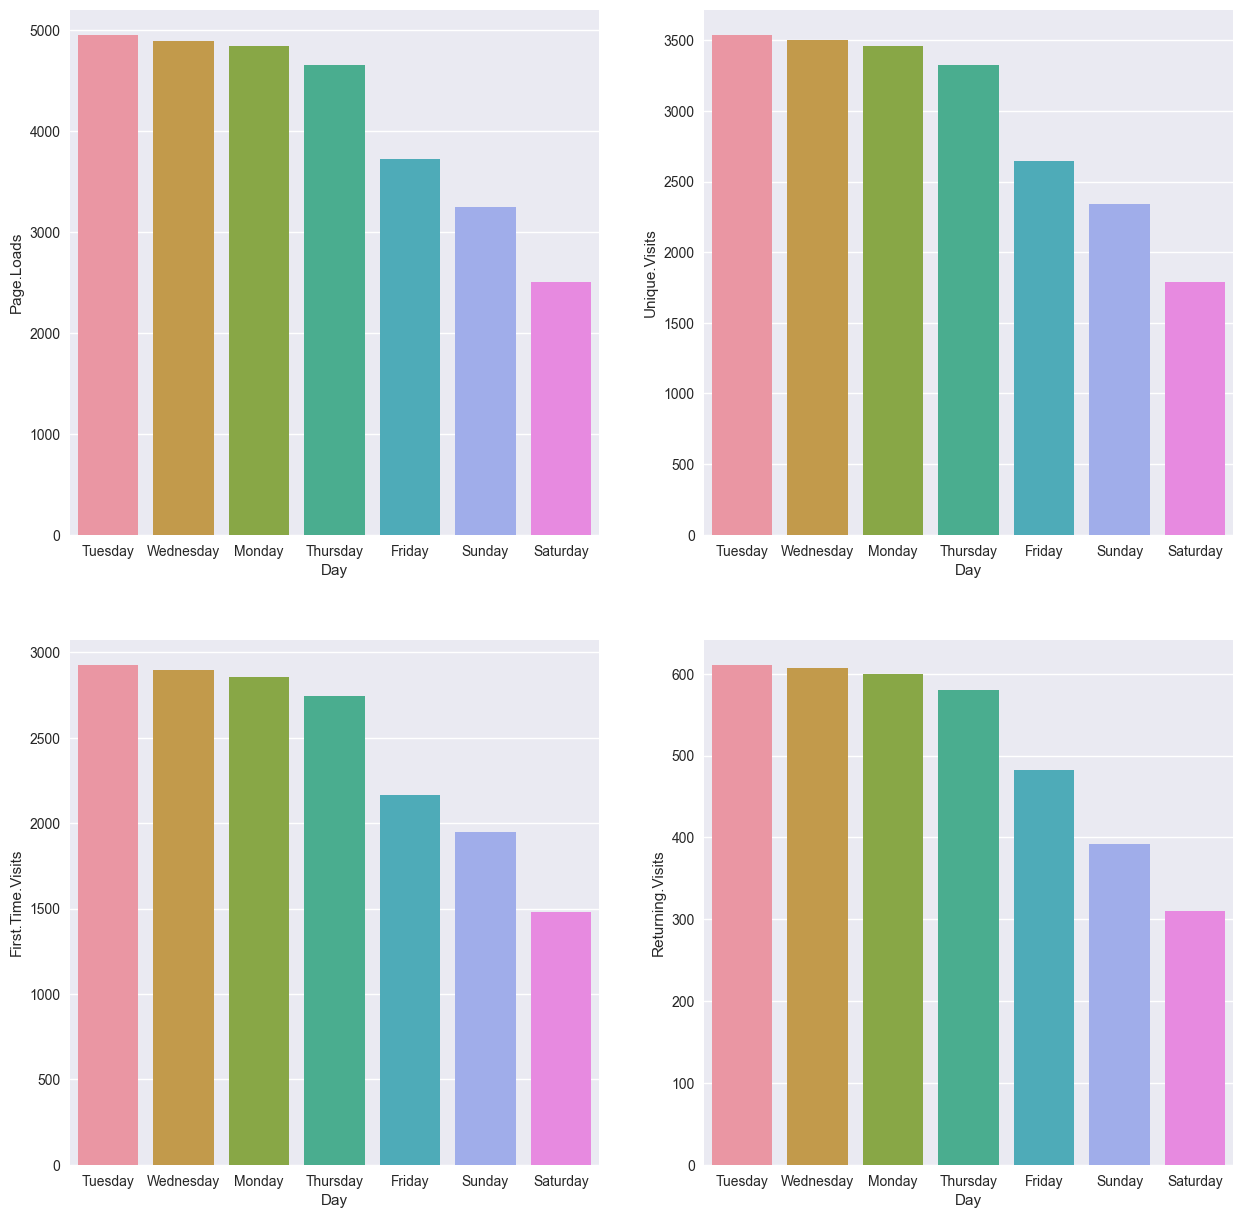

In [43]:
# Plot the Bargraph for every continuous variable across day
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=avg_day_data.sort_values(by=col, ascending=False), x='Day', y=col)

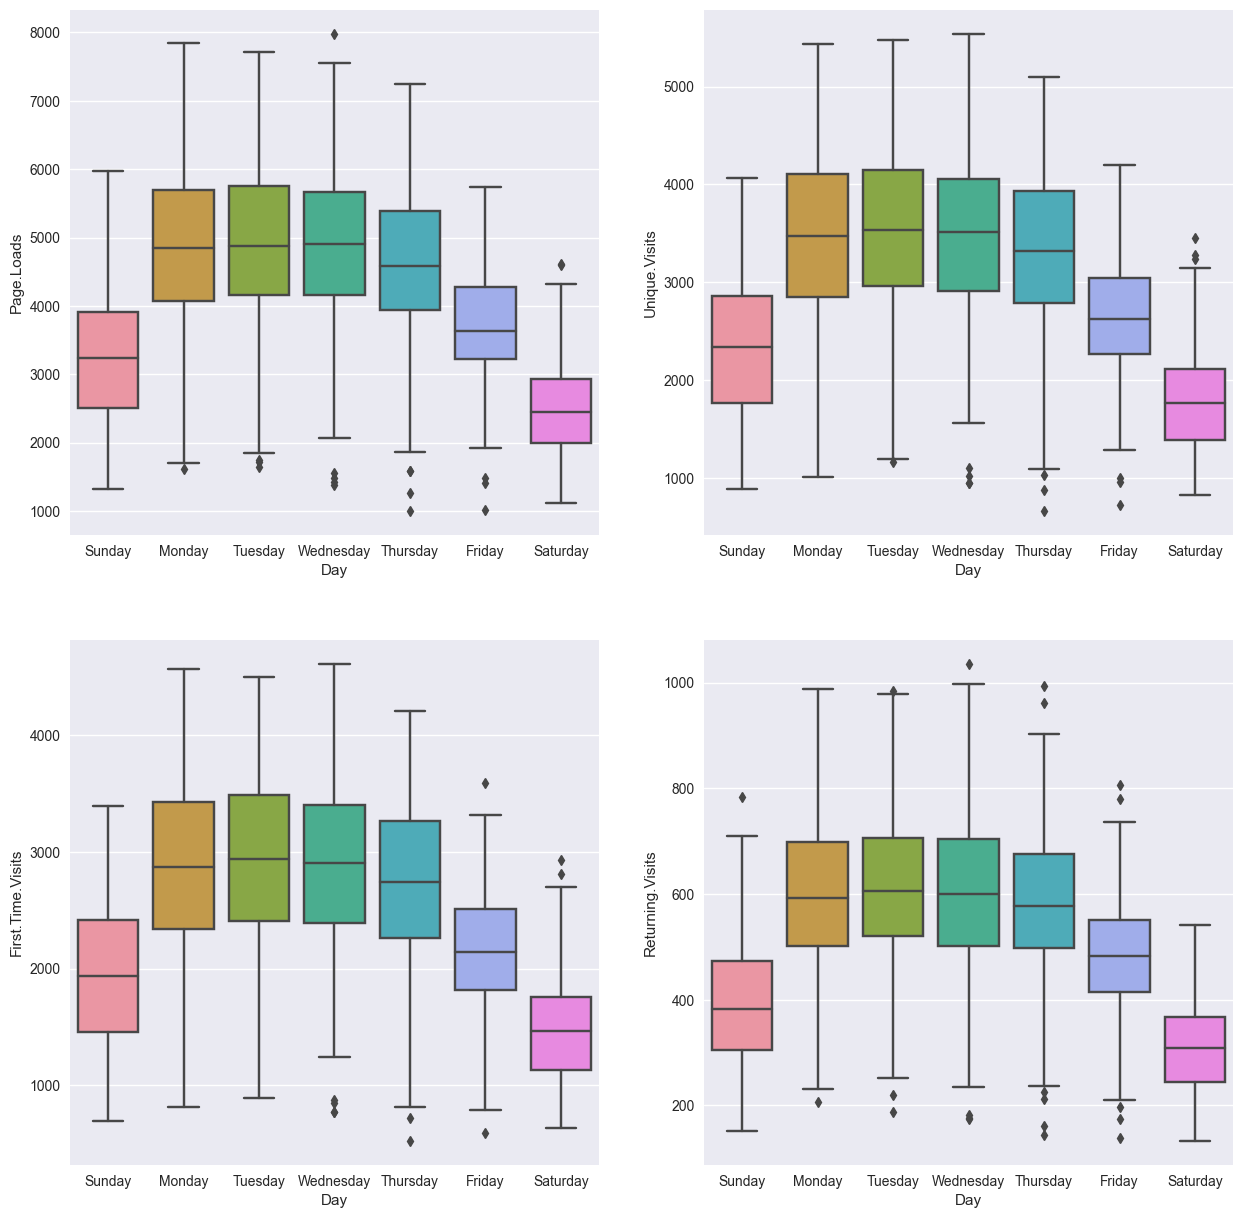

In [44]:
# Boxplots for all the continuous columns across day
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='Day', y=col)

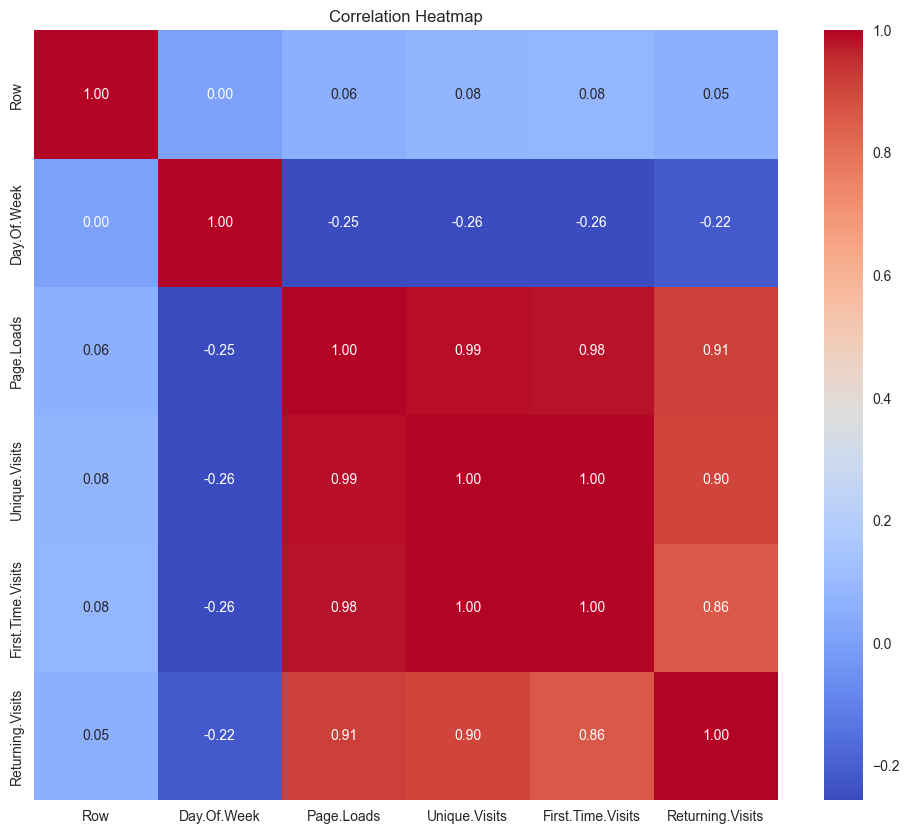

In [58]:
# Select the numeric columns from your DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Create a correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**High positive correlation can be observed between the following features:**
1. Page.Loads and Returning.Visits
2. Returning.Visits and Unique.Visits
3. Returning.Visits and First.Time.Visits
